In [12]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_maze

from lcs.agents.xcs import XCS, Configuration
from utils.xcs_utils import *

In [13]:
maze = gym.make('Maze5-v0')
print("This is how maze looks like")
situation = maze.reset()
print(type(situation))
print(situation)
maze.render()

This is how maze looks like
<class 'tuple'>
('0', '0', '0', '1', '0', '1', '1', '1')

■ ■ ■ ■ ■ ■ ■ ■ ■
■ □ □ □ □ □ □ $ ■
■ A □ ■ □ ■ ■ □ ■
■ □ ■ □ □ □ □ □ ■
■ □ □ □ ■ ■ □ □ ■
■ □ ■ □ ■ □ □ ■ ■
■ □ ■ □ □ ■ □ □ ■
■ □ □ □ □ □ ■ □ ■
■ ■ ■ ■ ■ ■ ■ ■ ■


In [14]:
cfg = Configuration(number_of_actions=8,
                    max_population=1600,
                    metrics_trial_frequency=100,
                    user_metrics_collector_fcn=xcs_maze_metrics)

df = avg_experiment(maze,
                    cfg,
                    number_of_tests=1,
                    explore_trials=4000,
                    exploit_trials=4000)

INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 100, 'reward': 0.0, 'perf_time': 0.031224900000097477, 'population': 52, 'numerosity': 102, 'average_specificity': 103.54901960784314, 'knowledge': 97.94520547945206}


Executing 0 experiment


INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 17, 'reward': 1002.9606864486374, 'perf_time': 0.05687790000001769, 'population': 350, 'numerosity': 1600, 'average_specificity': 28.04875, 'knowledge': 100.0}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 23, 'reward': 1000.3792643488007, 'perf_time': 0.08490669999991951, 'population': 334, 'numerosity': 1600, 'average_specificity': 34.48, 'knowledge': 100.0}
INFO:lcs.agents.Agent:{'trial': 1200, 'steps_in_trial': 100, 'reward': 1.3360874108178924e-12, 'perf_time': 0.23183819999985644, 'population': 229, 'numerosity': 1600, 'average_specificity': 54.68875, 'knowledge': 97.94520547945206}
INFO:lcs.agents.Agent:{'trial': 1600, 'steps_in_trial': 100, 'reward': 9.878432084326981e-206, 'perf_time': 0.26911330000007183, 'population': 246, 'numerosity': 1600, 'average_specificity': 60.8075, 'knowledge': 99.31506849315068}
INFO:lcs.agents.Agent:{'trial': 2000, 'steps_in_trial': 1, 'reward': 1710.0, 'perf_time': 0.0013762999999471

In [15]:
display(df)

,steps_in_trial,reward,perf_time,population,numerosity,average_specificity,knowledge
trial,,,,,,,
0,100,0.000000e+00,0.031225,52,102,103.54902,97.945205
100,100,5.688650e-87,0.242209,222,1600,40.70500,99.315068
200,100,1.790415e-27,0.314603,258,1600,52.13750,97.945205
300,63,1.000000e+03,0.202063,326,1600,31.38250,99.315068
400,17,1.002961e+03,0.056878,350,1600,28.04875,100.000000
...,...,...,...,...,...,...,...
7500,17,1.000000e+03,0.028059,282,1600,79.16250,100.000000
7600,14,1.000000e+03,0.053562,288,1600,87.34875,100.000000
7700,45,1.000000e+03,0.123023,279,1600,91.55625,100.000000


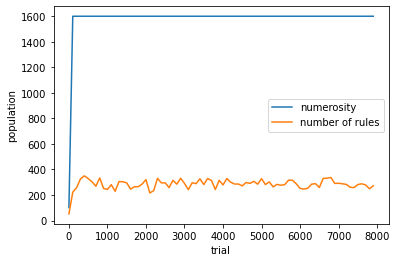

In [16]:
ax = df[['numerosity', 'population']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["numerosity", "number of rules"])

plt.show()

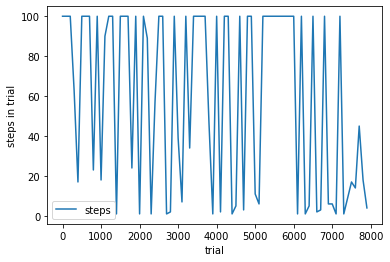

In [17]:
ax = df['steps_in_trial'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps in trial")
ax.legend(["steps"])

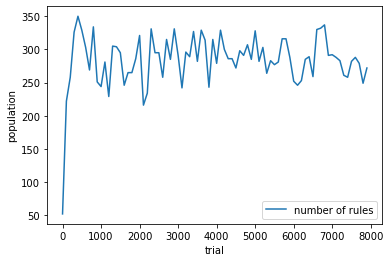

In [18]:
ax = df['population'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["number of rules"])

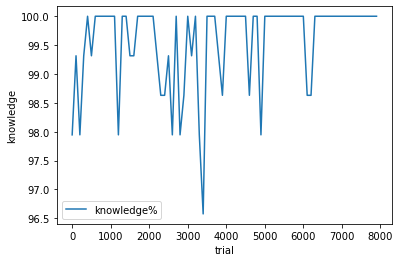

In [19]:
ax = df['knowledge'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("knowledge")
ax.legend(["knowledge%"])